In [1]:
import pandas as pd
import requests
from nba_api.stats.static import players
from nba_api.stats.endpoints import commonplayerinfo
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('active_players.csv')

In [4]:
country_count = df.groupby('COUNTRY')['COUNTRY'].count().sort_values(ascending = False)

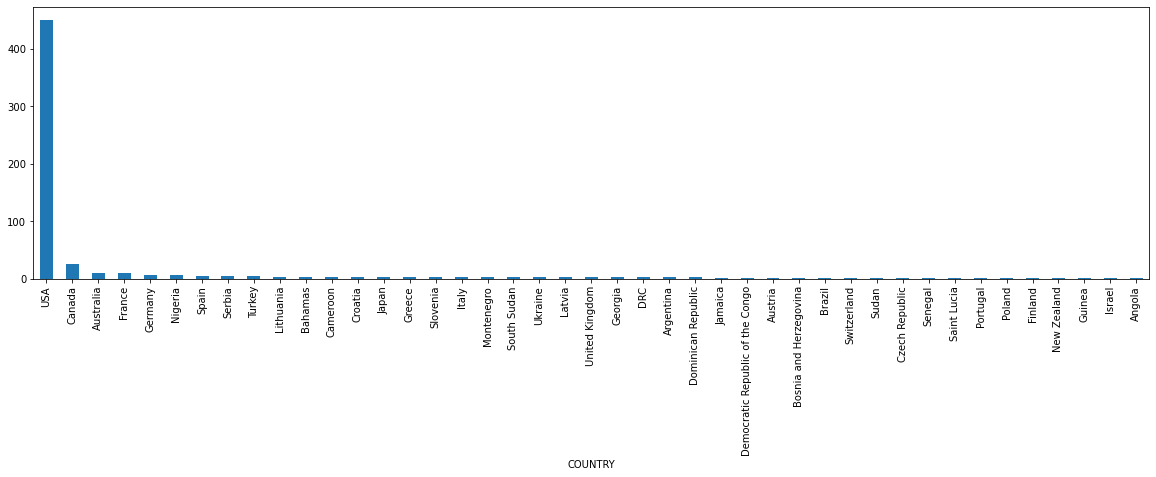

In [5]:
plt.figure(figsize=(20, 5))
country_count.plot(kind="bar")
plt.show()

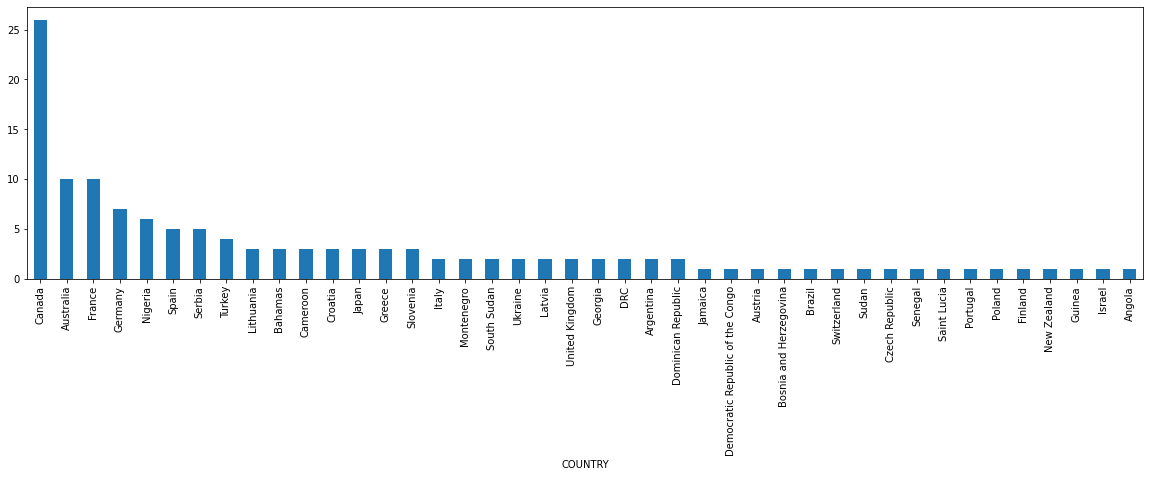

In [6]:
country_lss_thn_30 = country_count.loc[country_count < 30]

plt.figure(figsize=(20, 5))
country_lss_thn_30.plot(kind="bar")
plt.show()

In [7]:
schools_count = df.groupby('SCHOOL')['SCHOOL'].count().sort_values(ascending = False)
# .reset_index(name='count').sort_values(['count'], ascending=False)

big_schools = schools_count.loc[schools_count > 5]

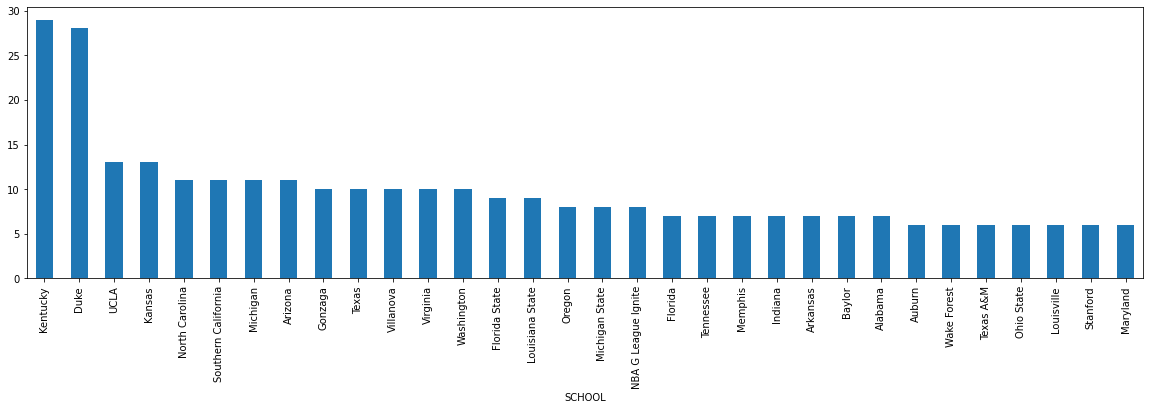

In [8]:
plt.figure(figsize=(20, 5))
big_schools.plot(kind="bar")
plt.show()

In [9]:
schools_df = pd.DataFrame(schools_count.index)

In [10]:
schools_df['count'] = schools_count.values

In [11]:
schools_df

,SCHOOL,count
0,Kentucky,29
1,Duke,28
2,UCLA,13
3,Kansas,13
4,North Carolina,11
...,...,...
184,Lipscomb,1
185,Lehigh,1
186,Le Mans,1
187,John A. Logan,1


In [27]:
count_schools = schools_df.groupby('count').size()

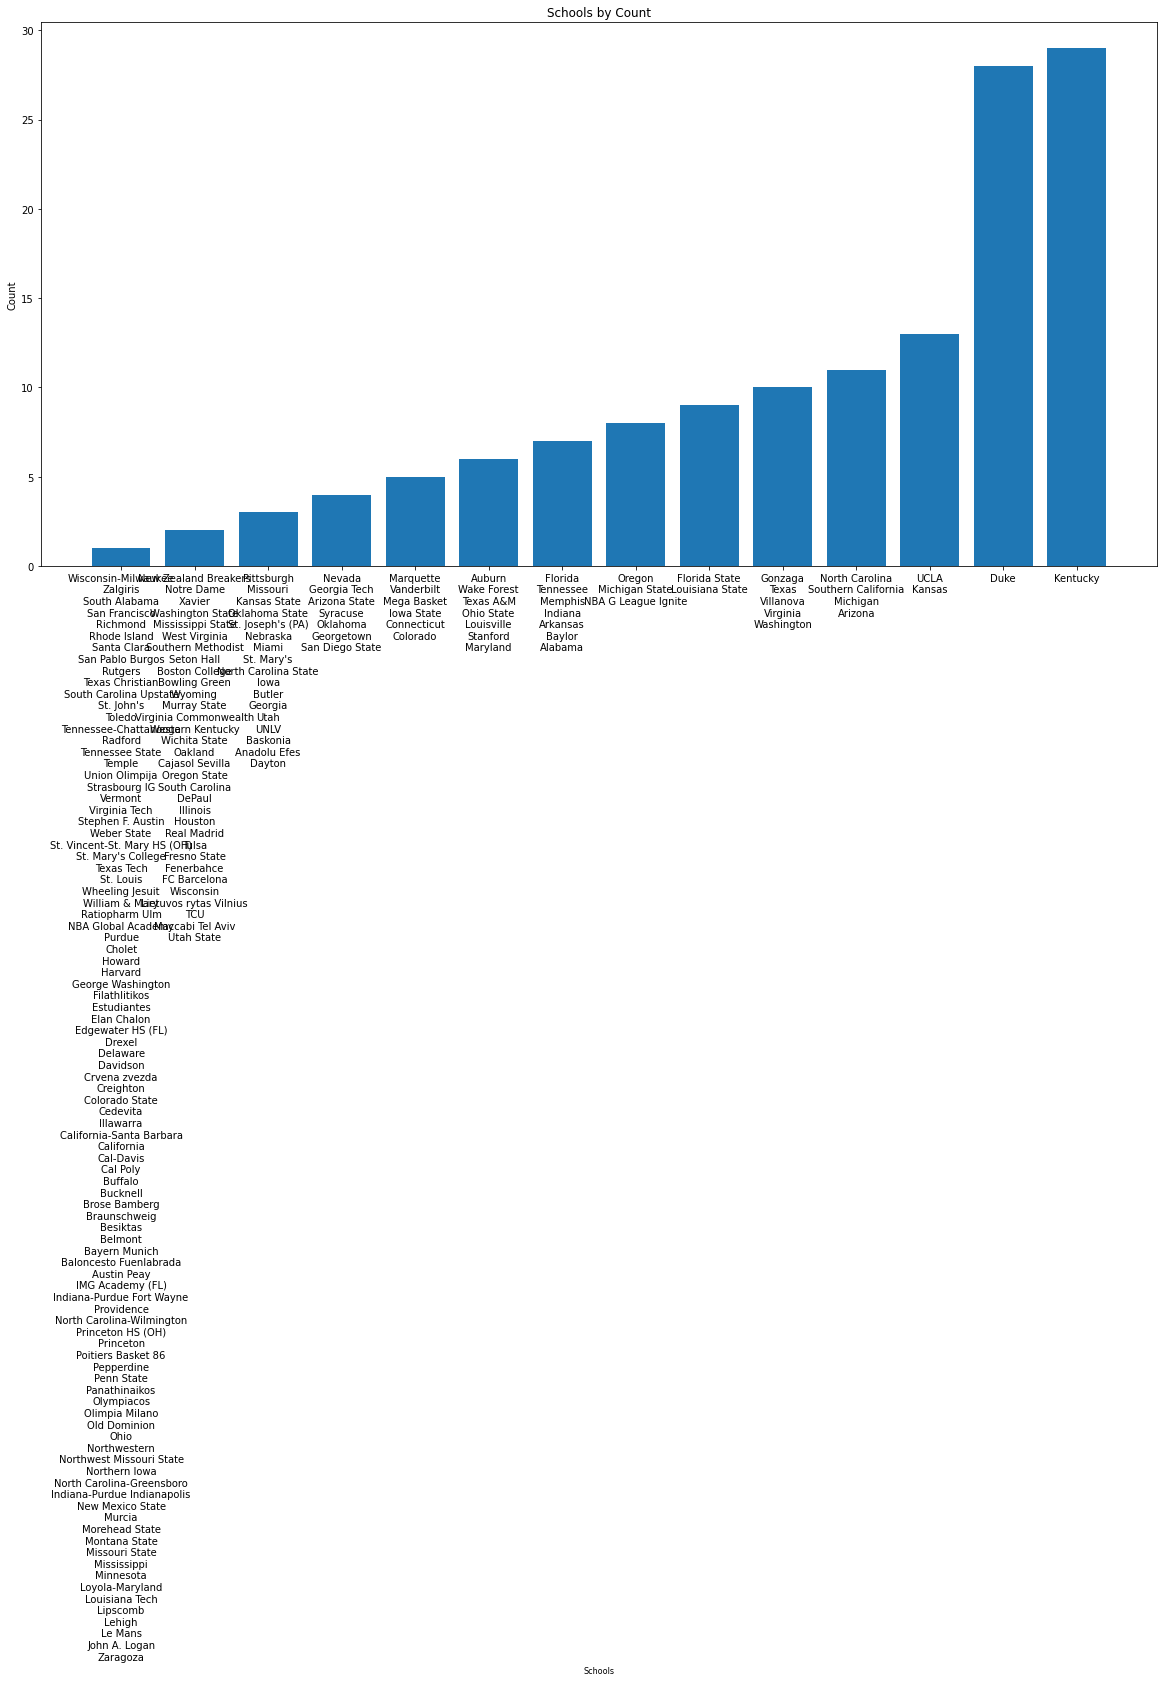

In [91]:
fig, ax = plt.subplots(figsize=(20, 10)) 

grouped = schools_df.groupby('count')['SCHOOL'].apply(lambda x: '\n'.join(x))

# create a bar chart using the grouped data
plt.bar(grouped.values, grouped.index, width=0.8)

# add labels and title
plt.xlabel('Schools', fontsize=8)
plt.ylabel('Count')
plt.title('Schools by Count')

# show the plot
plt.show()

In [92]:
small_schools = schools_count.loc[schools_count <= 5]

small_schools

SCHOOL
Marquette        5
Vanderbilt       5
Mega Basket      5
Iowa State       5
Connecticut      5
                ..
Lipscomb         1
Lehigh           1
Le Mans          1
John A. Logan    1
Zaragoza         1
Name: SCHOOL, Length: 157, dtype: int64

In [ ]:
df = df.drop(columns=[
    'Unnamed: 0', 
    'DISPLAY_LAST_COMMA_FIRST', 
    'DISPLAY_FIRST_LAST', 
    'DISPLAY_FI_LAST', 
    'PLAYER_SLUG', 
    'PLAYERCODE', 
    'GAMES_PLAYED_CURRENT_SEASON_FLAG', 
    'TEAM_ID', 
    'TEAM_CODE', 
    'DLEAGUE_FLAG'
])

In [ ]:
df.sort_values('HEIGHT')

In [ ]:
plt.figure(figsize=(20, 5))
height_count.plot(kind="bar")
plt.show()

Unfortunately the strings of 6-10 and 6-11 fall between 6'1" and 6'2"

In [ ]:
df.groupby(['POSITION', 'HEIGHT'])['HEIGHT'].count().reset_index(name='count').sort_values(['POSITION'])

In [ ]:
world_pop = pd.read_csv('population_by_country_2020.csv')

In [ ]:
world_pop['YearlyChangeFloat'] = world_pop['Yearly Change'].str.slice(0,4).astype(float)
world_pop['Population (2021)'] = world_pop['Population (2020)'] * (100 + world_pop['YearlyChangeFloat'])
world_pop['Population (2022)'] = world_pop['Population (2021)'] * (100 + world_pop['YearlyChangeFloat'])
world_pop['Population (2023)'] = world_pop['Population (2022)'] * (100 + world_pop['YearlyChangeFloat'])
world_pop